In [1]:
'''
Dieses Program soll dazu dienen die
Radardaten von BoxPol mit den GPM Daten
hinsichtlich der Reflektivitat zu validieren.
Hier werden mehrere Ueberflug analysiert
created by V. Pejcic
'''


'\nDieses Program soll dazu dienen die\nRadardaten von BoxPol mit den GPM Daten\nhinsichtlich der Reflektivitat zu validieren.\nHier werden mehrere Ueberflug analysiert\ncreated by V. Pejcic\n'

# Einlesen von Modulen
------------------------

In [1]:
#!/usr/bin/env python

import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import math
import pandas as pd
import wradlib
from scipy import stats
import matplotlib.cm as cm
my_cmap = cm.get_cmap('jet',40)
my_cmap.set_under('lightgrey')
my_cmap.set_over('darkred')
from pcc import get_miub_cmap as my_cmap
from pcc import plot_radar
from pcc import boxpol_pos
from pcc import plot_borders
import wradlib as wrl
from osgeo import osr
from satlib import ipoli_radi
from satlib import corcor
Pos = boxpol_pos()
blon0, blat0 = Pos['lon_ppi'], Pos['lat_ppi']
bbx, bby = Pos['gkx_ppi'], Pos['gky_ppi']
from time import *

% matplotlib inline

print ("_")

_


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationW

# Einlesen von fertig bearbeiteten  RADOLAN, BoXPol  und GPM DPR Daten
------------------------
- Dämpfungskorrektur nach HB (wradlib)

- Clutter entfernen mit $\rho_{HV} > 0.85$

- Offset 

- kein Beamblockage 

- DPR Threshold (15 dbz)

- ...


# Statistics..................
----------------------------------


In [2]:
import os
all_dpr, all_box, all_rad = np.array([]), np.array([]), np.array([])
all_dpr, all_box = np.array([]), np.array([])
lon_dpr, lat_box = np.array([]), np.array([])
raw_dpr, raw_box = np.array([]), np.array([])


#path = '/automount/ags/velibor/data/dpr_boxpol/'
path = '/automount/ags/velibor/data/dpr_boxpol_radolan/NS/good/'

c_liste = sorted(glob.glob(path+'/*.npy'))
for iii in range(len(c_liste)-1):
    
    a = np.load(c_liste[iii])[0]
    b = np.load(c_liste[iii])[2]
    c = np.load(c_liste[iii])[4]
    
    
    a = a.reshape(a.shape[0]*a.shape[1])
    b = b.reshape(b.shape[0]*b.shape[1])
    c = c.reshape(c.shape[0]*c.shape[1])
    
    print a.shape,b.shape,c.shape
    
    all_dpr = np.append(all_dpr,a)
    all_box = np.append(all_box,b)
    all_rad = np.append(all_rad,c)
    

    
print all_dpr.shape, all_box.shape, all_rad.shape


(16219,) (16219,) (16219,)
(10927,) (10927,) (10927,)
(15680,) (15680,) (15680,)
(11074,) (11074,) (11074,)
(15876,) (15876,) (15876,)
(13377,) (13377,) (13377,)
(13083,) (13083,) (13083,)
(14651,) (14651,) (14651,)
(15239,) (15239,) (15239,)
(15239,) (15239,) (15239,)
(15337,) (15337,) (15337,)
(14798,) (14798,) (14798,)
(14406,) (14406,) (14406,)
(16268,) (16268,) (16268,)
(15141,) (15141,) (15141,)
(12348,) (12348,) (12348,)
(229663,) (229663,) (229663,)


In [3]:
import os
all_dpr, all_box, all_rad = np.array([]), np.array([]), np.array([])
dpr_pha, dpr_typ = np.array([]), np.array([])
lon_dpr, lat_box = np.array([]), np.array([])
raw_dpr, raw_box = np.array([]), np.array([])


#path = '/automount/ags/velibor/data/dpr_boxpol/'
path = '/automount/ags/velibor/data/dpr_boxpol_radolan/NS/good'

c_liste = sorted(glob.glob(path+'/*.npy'))
for iii in range(len(c_liste)-1):
    
    a = np.load(c_liste[iii])[0]
    b = np.load(c_liste[iii])[2]
    c = np.load(c_liste[iii])[4]
    e = np.load(c_liste[iii])[5]
    f = np.load(c_liste[iii])[6]
    x = np.load(c_liste[iii])[7]
    y = np.load(c_liste[iii])[8]
    
    
    a = a.reshape(a.shape[0]*a.shape[1])
    b = b.reshape(b.shape[0]*b.shape[1])
    c = c.reshape(c.shape[0]*c.shape[1])
    e = e.reshape(e.shape[0]*e.shape[1])
    f = f.reshape(f.shape[0]*f.shape[1])
    
    print a.shape,b.shape,c.shape, e.shape, f.shape
    
    all_dpr = np.append(all_dpr,a)
    all_box = np.append(all_box,b)
    all_rad = np.append(all_rad,c)
    dpr_pha = np.append(dpr_pha,e)
    dpr_typ = np.append(dpr_typ,f)
    
# 2= liquid, 0=solid, 1=mixed
dpr_pha = dpr_pha.astype(int)/100  
dpr_typ = dpr_typ/10000000  

print all_dpr.shape, all_box.shape, all_rad.shape, dpr_pha.shape, dpr_typ.shape


(16219,) (16219,) (16219,) (16219,) (16219,)
(10927,) (10927,) (10927,) (10927,) (10927,)
(15680,) (15680,) (15680,) (15680,) (15680,)
(11074,) (11074,) (11074,) (11074,) (11074,)
(15876,) (15876,) (15876,) (15876,) (15876,)
(13377,) (13377,) (13377,) (13377,) (13377,)
(13083,) (13083,) (13083,) (13083,) (13083,)
(14651,) (14651,) (14651,) (14651,) (14651,)
(15239,) (15239,) (15239,) (15239,) (15239,)
(15239,) (15239,) (15239,) (15239,) (15239,)
(15337,) (15337,) (15337,) (15337,) (15337,)
(14798,) (14798,) (14798,) (14798,) (14798,)
(14406,) (14406,) (14406,) (14406,) (14406,)
(16268,) (16268,) (16268,) (16268,) (16268,)
(15141,) (15141,) (15141,) (15141,) (15141,)
(12348,) (12348,) (12348,) (12348,) (12348,)
(229663,) (229663,) (229663,) (229663,) (229663,)


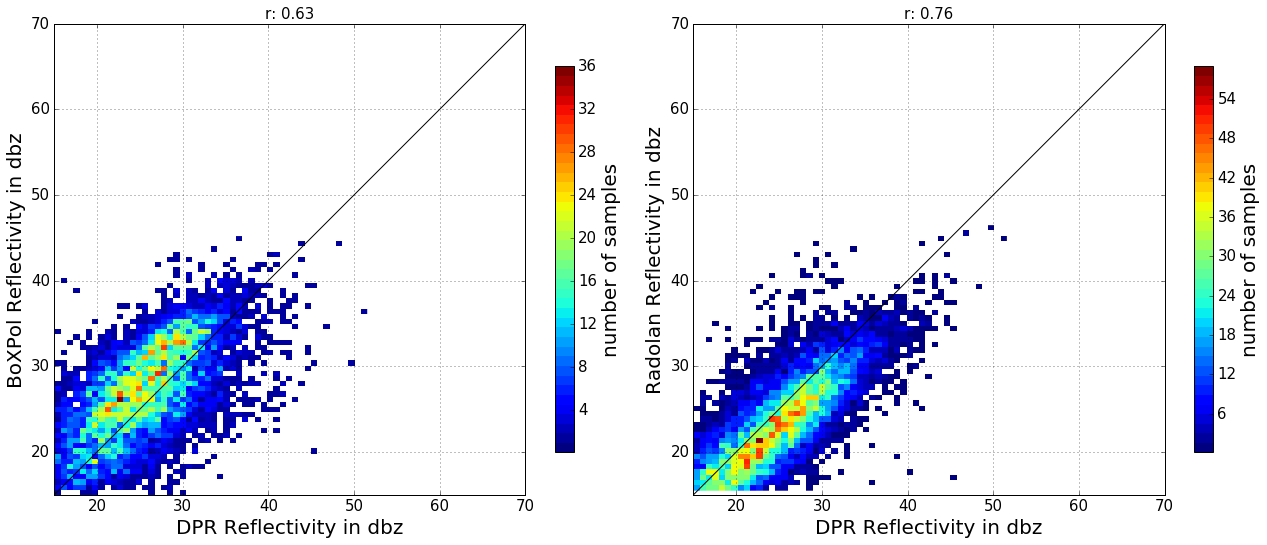

In [6]:
from pcc import get_my_cmap2
m1 = ~np.isnan(all_dpr) & ~np.isnan(all_box) 
m2 = ~np.isnan(all_dpr) & ~np.isnan(all_rad) 

ff, ff2 = 15,20
bb=50
fig =plt.figure(figsize=(18,8))
ax2 = fig.add_subplot(121, aspect='equal')
plt.hist2d(all_dpr[m1],all_box[m1], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dbz',fontsize=ff2)
plt.ylabel('BoXPol Reflectivity in dbz',fontsize=ff2)
plt.title('r: '+ corcor(all_dpr,all_box)[0:4], fontsize=ff)

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


x3 = fig.add_subplot(122, aspect='equal')
plt.hist2d(all_dpr[m2],all_rad[m2], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dbz',fontsize=ff2)
plt.ylabel('Radolan Reflectivity in dbz',fontsize=ff2)
plt.title('r: '+ corcor(all_dpr,all_rad)[0:4], fontsize=ff)

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)
#plt.savefig('/automount/ags/velibor/plot/IRS/NSliquidWS_Ref.png')
#plt.close()
plt.tight_layout()
plt.show()

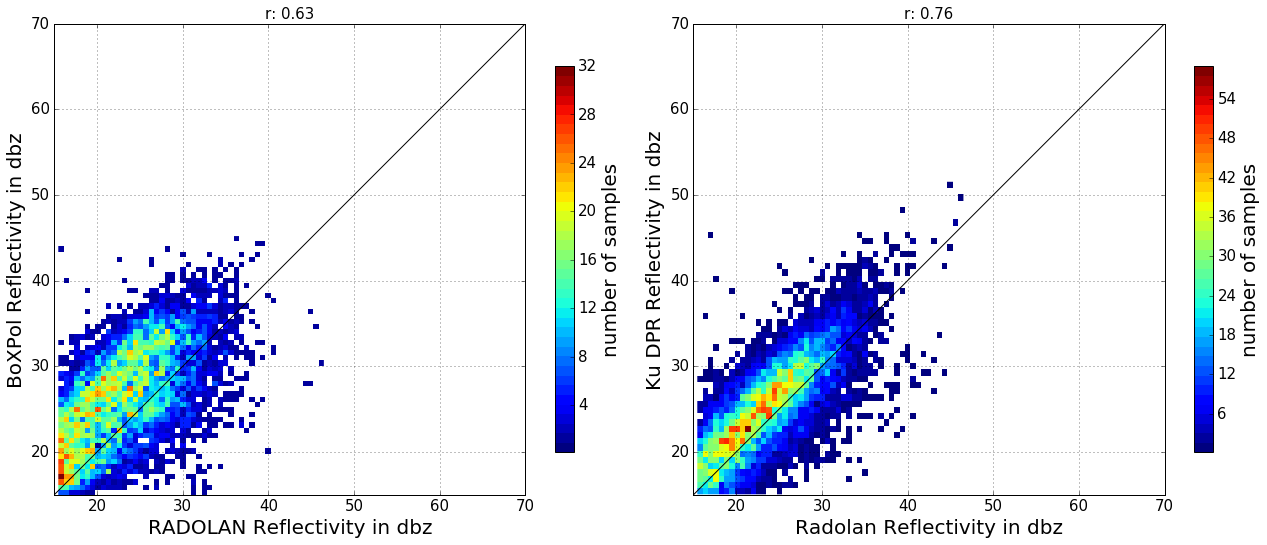

In [36]:
from pcc import get_my_cmap2
m1 = ~np.isnan(all_dpr) & ~np.isnan(all_rad) 
m2 = ~np.isnan(all_box) & ~np.isnan(all_rad) 

ff, ff2 = 15,20
bb=50
fig =plt.figure(figsize=(18,8))
ax2 = fig.add_subplot(121, aspect='equal')
plt.hist2d(all_rad[m2],all_box[m2], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('RADOLAN Reflectivity in dbz',fontsize=ff2)
plt.ylabel('BoXPol Reflectivity in dbz',fontsize=ff2)
plt.title('r: '+ corcor(all_dpr,all_box)[0:4], fontsize=ff)

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


x3 = fig.add_subplot(122, aspect='equal')
plt.hist2d(all_rad[m1],all_dpr[m1], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.ylabel('Ku DPR Reflectivity in dbz',fontsize=ff2)
plt.xlabel('Radolan Reflectivity in dbz',fontsize=ff2)
plt.title('r: '+ corcor(all_dpr,all_rad)[0:4], fontsize=ff)

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)
#plt.savefig('/automount/ags/velibor/plot/IRS/NSliquidWS_Ref.png')
#plt.close()
plt.tight_layout()
plt.show()

In [156]:
sum(np.isnan(all_dpr)),sum(np.isnan(all_box)), sum(np.isnan(all_rad))

(410634, 409933, 404257)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 426888 but corresponding boolean dimension is 112050

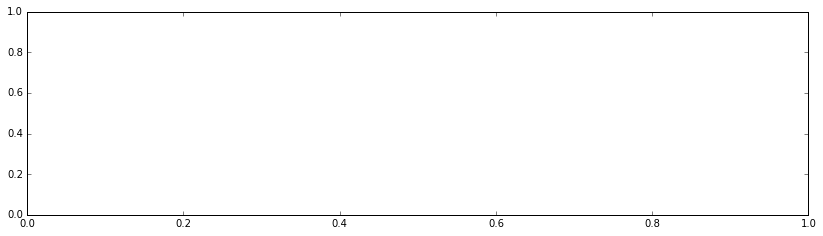

In [157]:
bb, aa, ll = 60, 1, 2
fig = plt.figure(figsize=(14,8))
plt.subplot(2,1,1)

plt.hist(all_dpr[md], bins=bb, alpha=aa, label='DPR',facecolor="None",
         edgecolor='green', linewidth=ll, normed=1,cumulative=True, histtype='step')
plt.hist(all_box[mb], bins=bb, alpha=aa, label='BoXPol',facecolor="None",
         edgecolor='black', linewidth=3, normed=1,cumulative=True, histtype='step')
plt.hist(all_rad[mr], bins=bb, alpha=aa, label='RADOLAN',facecolor="None",
         edgecolor='blue', linewidth=3, normed=1,cumulative=True, histtype='step')
plt.legend(loc='upper left')
plt.grid()
plt.ylim(0,1.1)

plt.subplot(2,1,2)
plt.hist(all_box[mb], bins=bb, alpha=aa, label='Boxpol',facecolor="None",
        edgecolor='black', linewidth=ll, normed=1)
plt.hist(all_dpr[md], bins=bb, alpha=aa, label='DPR',facecolor="None",
         edgecolor='green', linewidth=ll, normed=1)
plt.hist(all_rad[mr], bins=bb, alpha=aa, label='RADOLAN',facecolor="None",
         edgecolor='blue', linewidth=ll, normed=1)
plt.legend()
plt.xlabel('Reflectivity in dBZ',fontsize=ff2)

plt.grid()

In [ ]:


plt.figure(figsize=(14,5))

plt.hist(all_rad[mr],bins=50, facecolor="None", alpha=1, edgecolor='black', histtype='step', label='BoxPol')
plt.xlim(left=0)

plt.hist(all_dpr[md],bins=50, facecolor="None", alpha=1, edgecolor='green', histtype='step', label='DPR')

plt.hist(all_box[mb],bins=50, facecolor="None", alpha=1, edgecolor='blue', histtype='step', label='RADOLAN')
plt.axvline(0, color='black',ls='--',lw=3)
plt.grid()
plt.legend(fontsize=20)
#pl.ylim(top=90)
plt.ylabel('number', fontsize=20)
plt.xlabel(r'$Z_H$ in dbz', fontsize=20)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)
#pl.savefig('/automount/ftp/velibor/validation/matching_hist.png')

In [39]:
def subplot_bias(GR,SR, GR_name, SR_name):
    import matplotlib.pyplot as pl
    
    mm = ~np.isnan(GR)& ~np.isnan(SR)
    #pl.figure(figsize=(14,10))

    pl.hist(GR[mm]-SR[mm],bins=100, facecolor="grey", alpha=0.6)
    pl.axvline(np.mean(GR[mm]-SR[mm]), color='blue', label='Mean diff')
    pl.axvline(np.median(GR[mm]-SR[mm]), color='green', label='Median diff')
    pl.axvline(0, color='black',ls='--',lw=3)

    xmin, xmax = np.nanmin(GR[mm]-SR[mm]), np.nanmax(GR[mm]-SR[mm])
    limits = np.nanmax([abs(xmin),abs(xmax)])
    pl.xlim(-limits,limits)

    pl.title('Diff '+GR_name+'-'+SR_name+', bias: '+str( np.sum(GR[mm]-SR[mm])/len(GR[mm]-SR[mm]))+' dbz')
    pl.grid()
    pl.legend()
    pl.xlabel(SR_name+'overestimate-----------------------Diff in dbz-----------------------'+GR_name+' overestimate')
    pl.ylabel('number')
    #pl.savefig('/automount/ftp/velibor/validation/matching_bias.png')

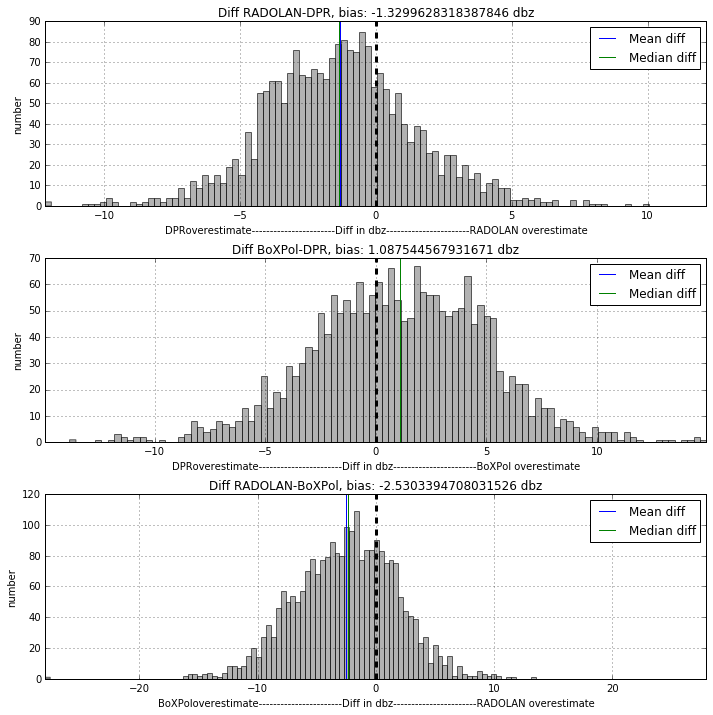

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
subplot_bias(all_rad, all_dpr, 'RADOLAN', 'DPR')

plt.subplot(3,1,2)
subplot_bias(all_box, all_dpr, 'BoXPol', 'DPR')

plt.subplot(3,1,3)
subplot_bias(all_rad, all_box, 'RADOLAN', 'BoXPol')

plt.tight_layout()

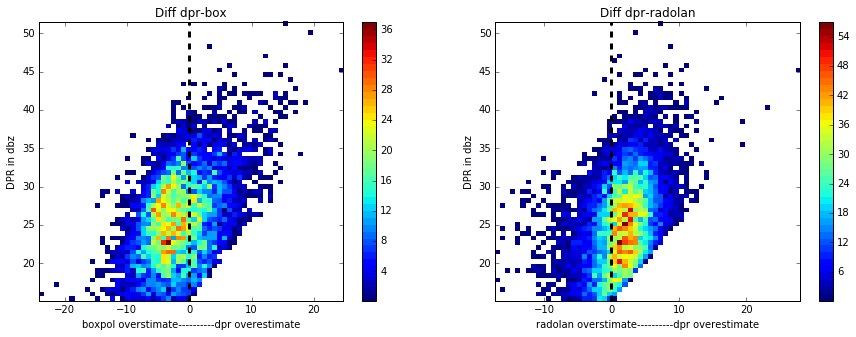

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist2d(all_dpr[m1]-all_box[m1],all_dpr[m1], bins=bb, cmap=get_my_cmap2(),vmin=0.1)
plt.axvline(0,linestyle='--', lw=3, color='black')
plt.title('Diff dpr-box')
plt.ylabel('DPR in dbz')
plt.colorbar()
plt.xlabel('boxpol overstimate----------dpr overestimate')

plt.subplot(1,2,2)
plt.hist2d(all_dpr[m2]-all_rad[m2],all_dpr[m2], bins=bb, cmap=get_my_cmap2(),vmin=0.1)
plt.axvline(0,linestyle='--', lw=3, color='black')
plt.title('Diff dpr-radolan')
plt.ylabel('DPR in dbz')
plt.colorbar()
plt.xlabel('radolan overstimate----------dpr overestimate')


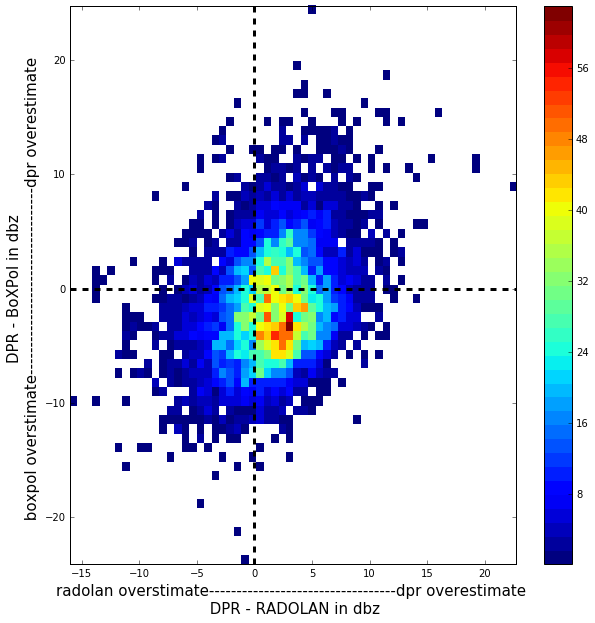

In [137]:
plt.figure(figsize=(10,10))
mmm =  ~np.isnan(all_dpr)& ~np.isnan(all_rad)& ~np.isnan(all_box)
plt.hist2d(all_dpr[mmm]-all_rad[mmm],all_dpr[mmm]-all_box[mmm], bins=bb, cmap=get_my_cmap2(),vmin=0.1)
plt.axvline(0,linestyle='--', lw=3, color='black')
plt.axhline(0,linestyle='--', lw=3, color='black')
plt.xlabel('radolan overstimate----------------------------------dpr overestimate \n DPR - RADOLAN in dbz', fontsize=15)
plt.ylabel('DPR - BoXPol in dbz \n boxpol overstimate----------------------------------dpr overestimate  ', fontsize=15)
plt.colorbar()

array([-92233720368547759,                  0,                  2])

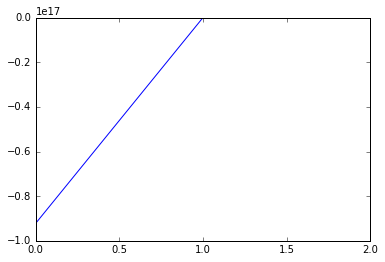

In [95]:
#dpr_pha = dpr_pha.astype(int)
plt.plot(np.unique(dpr_pha))
np.unique(dpr_pha)

# Phasen

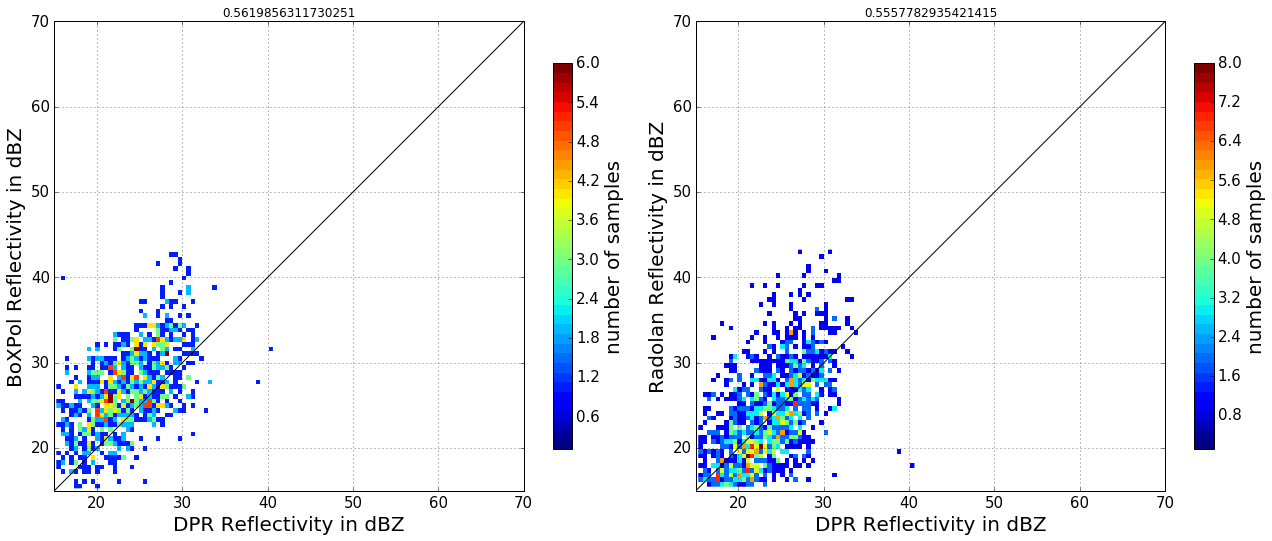

In [115]:
from pcc import get_my_cmap2

all_dpr = all_dpr[dpr_pha==0]
all_box = all_box[dpr_pha==0]
all_rad = all_rad[dpr_pha==0]


m1 = ~np.isnan(all_dpr) & ~np.isnan(all_box) 
m2 = ~np.isnan(all_dpr) & ~np.isnan(all_rad) 

ff, ff2 = 15,20
bb=50
fig =plt.figure(figsize=(18,8))
ax2 = fig.add_subplot(121, aspect='equal')
plt.hist2d(all_dpr[m1],all_box[m1], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
plt.ylabel('BoXPol Reflectivity in dBZ',fontsize=ff2)
plt.title(corcor(all_dpr,all_box))

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


x3 = fig.add_subplot(122, aspect='equal')
plt.hist2d(all_dpr[m2],all_rad[m2], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
plt.ylabel('Radolan Reflectivity in dBZ',fontsize=ff2)
plt.title(corcor(all_dpr,all_rad))

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)
#plt.savefig('/automount/ags/velibor/plot/IRS/NSliquidWS_Ref.png')
#plt.close()
plt.tight_layout()
plt.show()

# Raintype

array([-1.11100e-04,  1.10111e+00,  1.10121e+00, ...,          nan,
                nan,          nan])

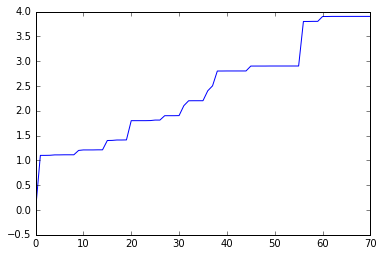

In [102]:
#dpr_pha = dpr_pha.astype(int)
plt.plot(np.unique(dpr_typ))
np.unique(dpr_typ)

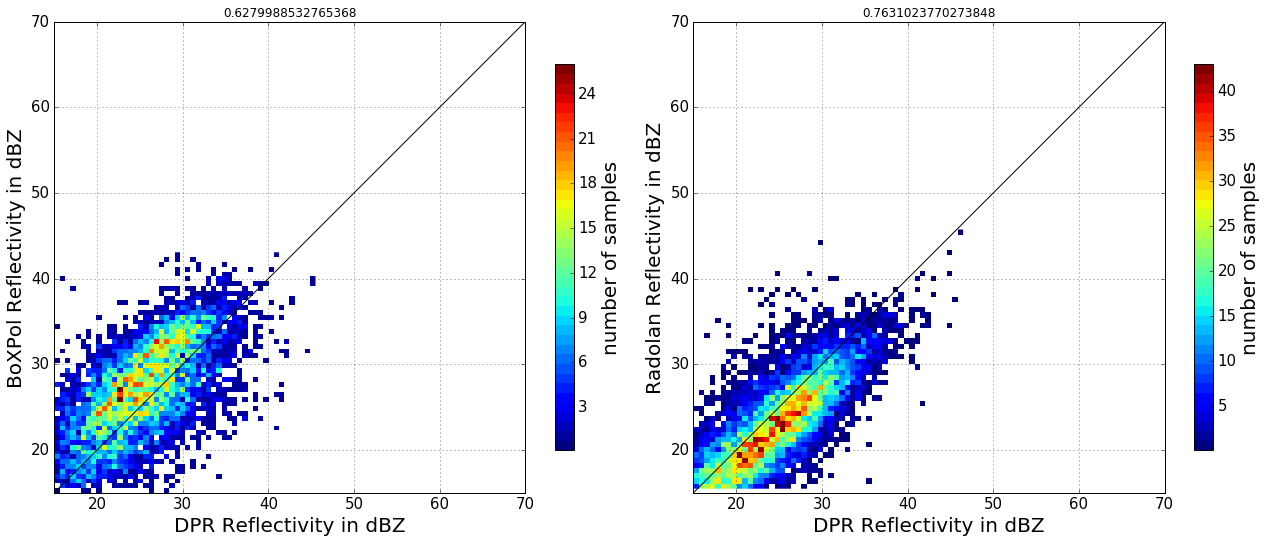

In [47]:
from pcc import get_my_cmap2

# Startiform
all_dpr = all_dpr[(dpr_typ>=1.) & (dpr_typ<2.)]
all_box = all_box[(dpr_typ>=1.) & (dpr_typ<2.)]
all_rad = all_rad[(dpr_typ>=1.) & (dpr_typ<2.)]

# Convectiv
#all_dpr = all_dpr[(dpr_typ>=2.) & (dpr_typ<3.)]
#all_box = all_box[(dpr_typ>=2.) & (dpr_typ<3.)]
#all_rad = all_rad[(dpr_typ>=2.) & (dpr_typ<3.)]

m1 = ~np.isnan(all_dpr) & ~np.isnan(all_box) 
m2 = ~np.isnan(all_dpr) & ~np.isnan(all_rad) 

ff, ff2 = 15,20
bb=50
fig =plt.figure(figsize=(18,8))
ax2 = fig.add_subplot(121, aspect='equal')
plt.hist2d(all_dpr[m1],all_box[m1], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
plt.ylabel('BoXPol Reflectivity in dBZ',fontsize=ff2)
plt.title(corcor(all_dpr,all_box))

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


x3 = fig.add_subplot(122, aspect='equal')
plt.hist2d(all_dpr[m2],all_rad[m2], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
plt.ylabel('Radolan Reflectivity in dBZ',fontsize=ff2)
plt.title(corcor(all_dpr,all_rad))

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)
#plt.savefig('/automount/ags/velibor/plot/IRS/NSliquidWS_Ref.png')
#plt.close()
plt.tight_layout()
plt.show()



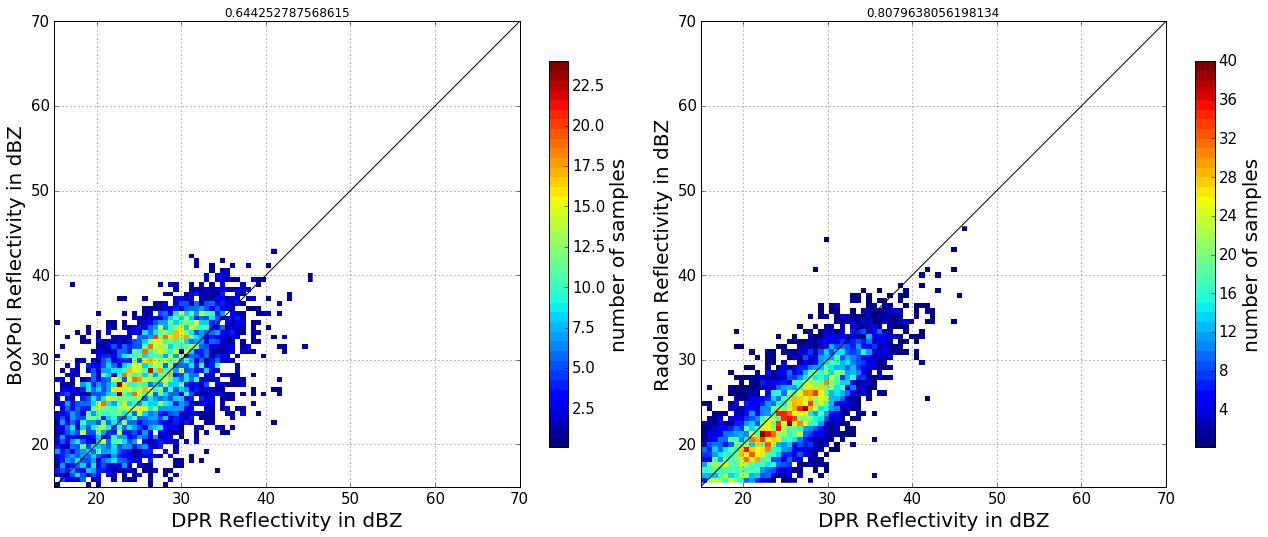

In [50]:
from pcc import get_my_cmap2

# Startiform
all_dpr = all_dpr[(dpr_typ>=1.) & (dpr_typ<2.)]
all_box = all_box[(dpr_typ>=1.) & (dpr_typ<2.)]
all_rad = all_rad[(dpr_typ>=1.) & (dpr_typ<2.)]
dpr_pha = dpr_pha[(dpr_typ>=1.) & (dpr_typ<2.)]
all_dpr = all_dpr[dpr_pha==2]
all_box = all_box[dpr_pha==2]
all_rad = all_rad[dpr_pha==2]

# Convectiv
#all_dpr = all_dpr[(dpr_typ>=2.) & (dpr_typ<3.)]
#all_box = all_box[(dpr_typ>=2.) & (dpr_typ<3.)]
#all_rad = all_rad[(dpr_typ>=2.) & (dpr_typ<3.)]

m1 = ~np.isnan(all_dpr) & ~np.isnan(all_box) 
m2 = ~np.isnan(all_dpr) & ~np.isnan(all_rad) 

ff, ff2 = 15,20
bb=50
fig =plt.figure(figsize=(18,8))
ax2 = fig.add_subplot(121, aspect='equal')
plt.hist2d(all_dpr[m1],all_box[m1], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
plt.ylabel('BoXPol Reflectivity in dBZ',fontsize=ff2)
plt.title(corcor(all_dpr,all_box))

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)


x3 = fig.add_subplot(122, aspect='equal')
plt.hist2d(all_dpr[m2],all_rad[m2], bins=bb, cmap=get_my_cmap2(),vmin=0.1)

cbar = plt.colorbar(shrink=0.7)
cbar.set_label('number of samples', fontsize=ff2)
cbar.ax.tick_params(labelsize=ff)

#plt.title('Liquid Phase Corr: ' + str(round(z_corr,3)) + r'$\pm$'+  str(round(z_eror,3)), fontsize=ff2)
plt.xlim(15,70)
plt.ylim(15,70)
cx,cy = np.arange(0,80,1),np.arange(0,80,1)
plt.plot(cx,cy, color='black')
plt.xlabel('DPR Reflectivity in dBZ',fontsize=ff2)
plt.ylabel('Radolan Reflectivity in dBZ',fontsize=ff2)
plt.title(corcor(all_dpr,all_rad))

plt.grid()
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)
#plt.savefig('/automount/ags/velibor/plot/IRS/NSliquidWS_Ref.png')
#plt.close()
plt.tight_layout()
plt.show()

